# Assignment 4 (15 points)

Please, answer the question by entering runable python code into the cells. Add comments at the beginning of each cell which list the packages that need to be installed (e.g., pip install collections). Run the code so that the output is visible in the notbook before you submit. 

Use python 3.
Submit the notebook (as .ipynb and .pdf) via email to clwagner@uni-koblenz.de (cc to wayne@uni-koblenz.de) until 5.7.2017 (midnight CET). 
Subject of email: "CSS2017 Ass4"
Filename: firstname_lastname_ass4.ipynb



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Simple Contagion: SIR Model (5 points)

Create 3 different network topologies (checkout different network generators [1]) and spread a disease in these networks using the SIR model (which you have to implement yourself; dont use packages like nepidemix). Compare your results with the results from spreading the disease in a fully connected ndtwork.
How do the different network topolgies impact the results?

At the beginning all nodes are susceptible and one randomly picked node is infected.
Choose different infection probabilities and death probabilities.
Plot the proportion of nodes in each state after k steps. 


[1] https://networkx.github.io/documentation/development/reference/generators.html



In [2]:
%pylab inline 

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import networkx as NX
import random as RD

import time
from collections import defaultdict
import copy


def init_fully_connected_network(n): 
    global g
    g = NX.random_regular_graph(n-1, n) 
    init_network_state()
    
def init_small_world(n, k, p): 
    global g
    g = NX.watts_strogatz_graph(n, k, p) 
    init_network_state()
       
def init_random_network(n, p): 
    global g 
    # n Num of nodes, p  Probability for edge creation.
    g = NX.erdos_renyi_graph(n, p)
    init_network_state()
    
def init_complete_graph(n):
    global g
    g = NX.complete_graph(n)
    init_network_state()
    
def init_path_graph(n):
    global g
    g = NX.star_graph(n)
    init_network_state()

def init_network_state():
    global g
    # Set up default values for attributes
    for nd in g.nodes_iter():
        g.node[nd]['state'] = "susceptible"

    # select one node randomly and infect it    
    random_node_id = RD.choice(g.nodes())
    g.node[random_node_id]["state"] = "infected"
  
    


def draw():
    #PL.cla()
    global g, positions
    colors = defaultdict(int)
    for nd in g.nodes():
        if g.node[nd]["state"] == "infected":
            colors[nd] = "red"
        elif g.node[nd]["state"] == "removed":
            colors[nd] = "yellow"
        else:
            colors[nd] = "blue"
            
    plt.figure()
    NX.draw_networkx(g, pos=None, arrows=False, with_labels=False, node_color=list(colors.values()), node_size=20, width=0.6)
    plt.show()


Populating the interactive namespace from numpy and matplotlib


In [3]:
def countSIR(g):
    S,I,R = 0,0,0
    for v in g.node.values():
        if v['state'] == "infected":
            I = I+1
        if v['state'] == "susceptible":
            S = S+1
        if v['state'] == "removed":
            R = R+1    
    return S,I,R

In [4]:
def return_infected_nodes():
    keys = []
    for k,v in g.node.items():
        if v['state'] == "infected":
            keys.append(k)
    return keys

In [5]:
def prop_ifc(beta,gama,S,I,R,N,t):
    N = float(N)
    return beta*(S/N)*(I/N)*t - gama*(I/N)

In [6]:
def prop_rem(gama,I,N):
    N = float(N)
    return gama*I/N

In [150]:
# init_fully_connected_network(10)
# draw()

In [8]:
# k = return_infected_nodes()
# g.neighbors(k[0])
# print(g.neighbors(k[0]))
# a = random.choice(g.neighbors(k[0]))
# a

In [9]:
def stepSIR(beta, gama,t):
    S,I,R = countSIR(g)
    N = S+I
    infected_nodes = return_infected_nodes()
    for inf_nod in infected_nodes:
        i = random.choice(g.neighbors(inf_nod))  
        if random.random() < prop_ifc(beta,gama,S,I,R,N,t) and g.node[i]['state'] is "susceptible":
            g.node[i]['state'] = 'infected'
#             continue
        if random.random() < prop_rem(gama,I,N) and g.node[i]['state'] is not "susceptible":
            g.node[i]['state'] = "removed"
    S,I,R = countSIR(g)
    return S,I,R

In [10]:
def runSIR(beta,gama,n):
    stats_dict = {}
    S,I,R = countSIR(g)
    temp_dic = {}
    temp_dic["S"] = S
    temp_dic["I"] = I
    temp_dic["R"] = R
    stats_dict[0] = temp_dic
    for i in range(n):
        S,I,R = stepSIR(beta,gama,i)
        temp_dic = {}
        temp_dic["S"] = S
        temp_dic["I"] = I
        temp_dic["R"] = R
        stats_dict[i+1] = temp_dic
    return stats_dict

In [11]:
# init_small_world(300,2,0.3)
# # draw()
# s = runSIR(0.1,0.05,1000)
# draw()

In [12]:
def return_stat_df(stat_dict):
    stat_df = pd.DataFrame(stat_dict).transpose()
    return stat_df

In [17]:
def plot(topology,beta, gama, steps, nnodes):
    if topology == "Small World":
        init_small_world(nnodes, 5, 0.3)
    if topology == "Fully Connected Network":
        init_fully_connected_network(nnodes)
    if topology == "Random Network":
        init_random_network(nnodes,0.3)
    if topology == "Complete graph":
        init_path_graph(nnodes)
        
    s = runSIR(beta,gama,steps)
    df = return_stat_df(s)
    plt.title("Network topology: {}".format(topology))
    plt.ylabel('Number of nodes')
    plt.xlabel('Steps')
    plt.plot(df.S.values,'-b',label='susceptible')
    plt.plot(df.I.values,'-r',label='infected')
    plt.plot(df.R.values,'-g',label='removed')
    plt.legend(loc='center left')

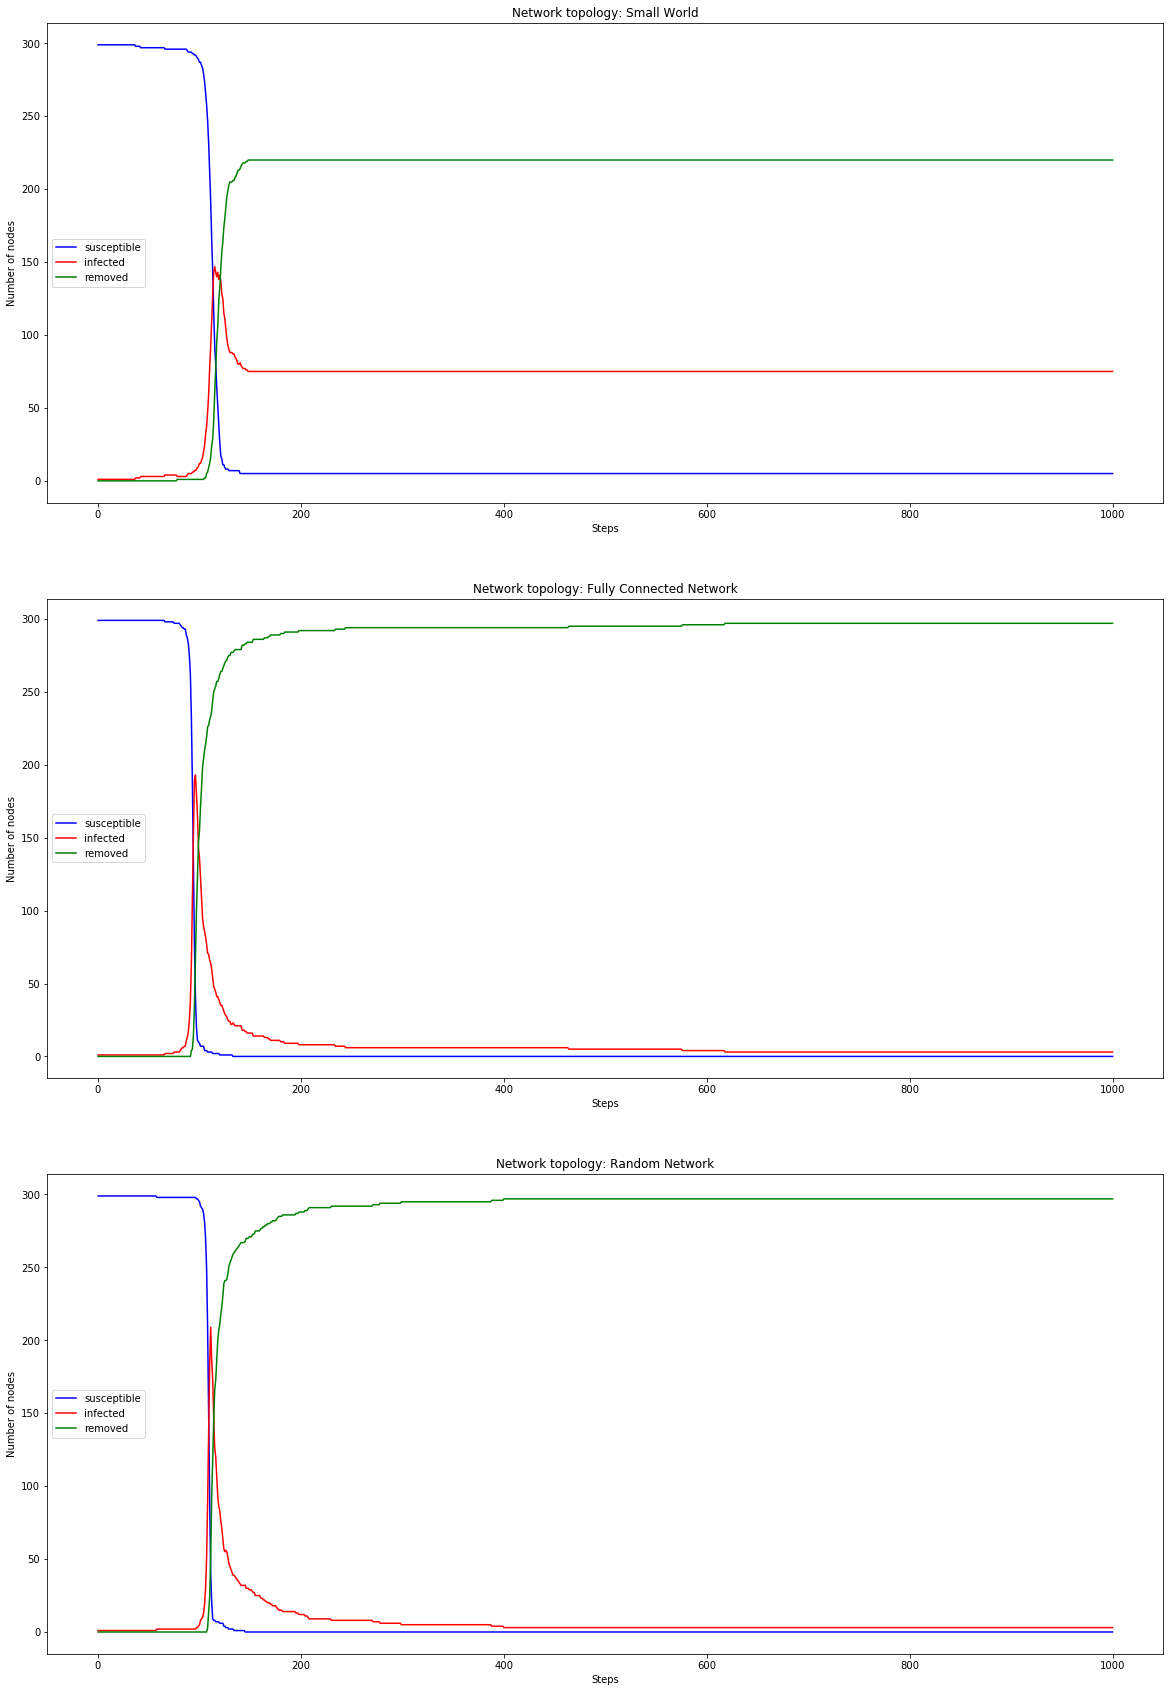

In [18]:
plt.figure(figsize=(20, 30))
plt.subplot(3,1,1)
plot("Small World",0.1, 0.3,1000,300)
plt.subplot(3,1,2)
plot("Fully Connected Network",0.1, 0.3,1000,300)
plt.subplot(3,1,3)
plot("Random Network",0.1, 0.3,1000,300)

* In the small world network,nodes are less connected with other nodes which means they have less interactions and this means they have a lower chance to get infected. Also there are some nodes that have just a few connections who also have jsut a few connections, which means that they might not interact with infected nodes. 

* In the fully connected network, every node is connected to every other node, which results in more infected nodes and therefore, more removed nodes. 

* In the random network, the number of infected nodes is a bit larger. The difference between this topology and the fully connected, because the random network is almost fully connected 

### ### Complex Contagion: Granovetter's Linear Treshold Model (5 points)


Implement Granovetter's Linear Treshold Model. Assume that the thresholds of people are normally distributed. Use you code to explore complex contagion in different network topologies (look at network generators [1]). 
Create at least 3 different network topologies. 
Interpret and discuss your results.


[1] https://networkx.github.io/documentation/development/reference/generators.html


In [131]:
# implement granovetter
# thresholds are normally distributed
# Create at least 3 different network topologies
# Interpret and discuss your results 
# plot the percentage and not the number

In [132]:
def generate_thresholds(mean, std, n):
    x = np.random.normal(mean,std,n)
#     print(x)
#     normalized = [(item-min(x))/(max(x)-min(x)) for item in x]
#     print(normalized)
    return x
#     return normalized

In [133]:
# generate_thresholds(0,1,50)

In [134]:
def init_network_state_cc():
    global g
    # Set up default values for attributes
    thresholds = generate_thresholds(0.5,0.2,g.number_of_nodes())
    for nd in g.nodes_iter():
        g.node[nd]['threshold'] = thresholds[nd]
        g.node[nd]['riot'] = "no"

    # select one node randomly and infect it  
    for i in range(int(g.number_of_nodes()*0.2)):
        random_node_id = RD.choice(g.nodes())
        g.node[random_node_id]["riot"] = "yes"

In [135]:
def init_fully_connected_network_cc(n): 
    global g
    g = NX.random_regular_graph(n-1, n) 
    init_network_state_cc()
    
def init_small_world_cc(n, k, p): 
    global g
    g = NX.watts_strogatz_graph(n, k, p) 
    init_network_state_cc()
       
def init_random_network_cc(n, p): 
    global g 
    # n Num of nodes, p  Probability for edge creation.
    g = NX.erdos_renyi_graph(n, p)
    init_network_state_cc()
def init_complete_graph_cc(n):
    global g
    g = NX.complete_graph(n)
    init_network_state_cc()

In [136]:
def draw_cc():
    #PL.cla()
    global g, positions
    colors = defaultdict(int)
    for nd in g.nodes():
        if g.node[nd]["riot"] == "yes":
            colors[nd] = "red"
        elif g.node[nd]["riot"] == "no":
            colors[nd] = "yellow"
            
    plt.figure()
    NX.draw_networkx(g, pos=None, arrows=False, with_labels=False, node_color=list(colors.values()), node_size=20, width=0.6)
    plt.show()

In [137]:
# init_fully_connected_network_cc(10)
# draw_cc()


In [138]:
def countCC(graph):
    yes,no = 0,0
    for v in graph.node.values():
        if v['riot'] == "yes":
            yes = yes+1
        if v['riot'] == "no":
            no = no+1
    return yes, no

In [139]:
def payoff(node):
    global g
    hood = g.neighbors(node)
    pro = 0
    n = len(hood)
    for i in hood:
        if g.node[i]['riot'] == "yes":
            pro += 1 
    return pro/n

In [140]:
def return_rioting_nodes():
    global g
    keys = []
    for k,v in g.node.items():
        if v['riot'] == "yes":
            keys.append(k)
    return keys

In [141]:
def stepCC(g):
#     yes,no = countCC(g)
#     print("STEP")
    for idn, props in g.node.items():
        if props['riot'] == 'yes':
            continue
        elif props['threshold'] < payoff(idn):
            props['riot'] = 'yes'
    yes,no = countCC(g)
    return yes,no

In [142]:
def runCC(steps):
    global g
    statsCC = {}
    yes, no = countCC(g)
    temp_dic = {}
    temp_dic["yes"] = yes
    temp_dic["no"] = no
    statsCC[0] = temp_dic
    for i in range(steps):
        temp_dic = {}
        temp_dic["yes"], temp_dic["no"] = stepCC(g)
        statsCC[i+1] = temp_dic
    return statsCC

In [143]:
# init_small_world_cc(5, 2, 0.8)
# draw_cc()
# stepCC(g)
# draw_cc()
# stepCC(g)
# draw_cc()
# stepCC(g)
# draw_cc()

In [144]:
init_small_world_cc(1000, 3, 0.8)
sw = runCC(30)

In [145]:
init_fully_connected_network_cc(n=1000)
fcn = runCC(30)

In [146]:
init_random_network_cc(1000, 0.4)
rn = runCC(30)

In [147]:
init_complete_graph_cc(1000)
cg = runCC(30)

In [148]:
# init_complete_graph_cc(1000)
# runCC(30)

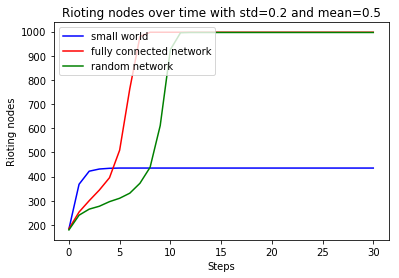

In [149]:
sw = return_stat_df(sw)
fcn = return_stat_df(fcn)
rn = return_stat_df(rn)
# cg = return_stat_df(cg)
plt.plot(sw.yes.values,'-b',label='small world')
plt.plot(fcn.yes.values,'-r',label='fully connected network')
plt.plot(rn.yes.values,'-g',label='random network')
# plt.plot(cg.yes.values,'-b',label='connected graph')
plt.title('Rioting nodes over time with std=0.2 and mean=0.5')
plt.ylabel('Rioting nodes')
plt.xlabel('Steps')
plt.legend(loc='upper left')

* The number of rioting nodes in a small world network converges at around 300-400 rioting nodes because the nodes with a high threshold can have just two neighbors and one of the neighbors can have a degree of 1 for example. This means that our high threshold node will never start rioting if our 1 degree neighbor is not rioting from the begining (if he is not rioting from the start, so he will also never riot). This means that there will always be 'peaceful' nodes left in our network. 
* The number of rioting nodes for the fully connected network grows fastest and converges at the end, because every node is connected to all other nodes, and with every new node with a small threshoald which transforms from 'peaceful' to rioting, the nodes with a slightly greater threshold then the ones that transformed in the current step will transform in the next step, because the proportion of rioting nodes in their neighborhood will grow. In the end they will all be rioting.  
* In the random network at some point, all nodes are rioting, but it gets there slower than the fully connected network, because not every node is connected to all other nodes, so the riot spreads a bit slower.

### Axelrod Model (5 points)

Implement Axelrods  model of cultural diffusion.
Create a network and randomly assign a cultural vector to each node.
Implement the dynamic process as describe in: http://www-personal.umich.edu/~axe/research/Dissemination.pdf
Try different number of features and traits per feature.
Make a plot that describes the macro-state of the system (e.g., depict the number of groups that share a culture. At the beginning each node has it's own culture')?


In [65]:
def cultural_vector(vec_len, traits):
    return [random.randint(1,traits+1) for x in range(vec_len)]

In [66]:
def overlap(vec_1,vec_2):
    x = set(vec_1)
    y = set(vec_2)
    return len(x.intersection(x,y))/len(vec_1)

In [67]:
def cultural_exchange(c_node, c_neighbor):
    x = set(c_node)
    y = set(c_neighbor)
    diff = y.difference(x)
    if len(diff) > 0:
        feature = random.choice(list(diff))
        index = c_neighbor.index(feature)
        c_node[index] = feature
    return c_node

In [68]:
def init_cultures(f,t):
    global g
    # Set up default values for attributes
    for nd in g.nodes_iter():
        g.node[nd]['culture'] = cultural_vector(f,t)
        
def network(n,f,t): 
    global g 
    # n Num of nodes, p  Probability for edge creation.
    g = NX.random_regular_graph(n-1, n) 
    init_cultures(f,t)

In [69]:
def distinct_cultures():
    global g
    cultures = []
    for nd in g.nodes_iter():
            cultures.append(g.node[nd]['culture'])
    df = pd.DataFrame(cultures)
    df = df.drop_duplicates()
    return len(df)

In [70]:
def step():
    global g
    node_id = random.choice(g.nodes())
    neighbor_id = random.choice(g.neighbors(node_id))
    if random.random() < overlap(g.node[node_id]['culture'], g.node[neighbor_id]['culture']):
        g.node[node_id]['culture'] = cultural_exchange(g.node[node_id]['culture'], g.node[neighbor_id]['culture'])

In [71]:
def iterate(steps):
    global g
    distinct = []
    for i in range(0,steps):
        step()
        distinct.append(distinct_cultures())
    return distinct

In [127]:
def return_stabilization(lst):
    lst = list(enumerate(lst))
    x = lst[-1]
#     print(x[1])
    for i in reversed(lst):
#         print(i)
        if i[1] != x[1]:
            return lst.index(i)+1, i[1]-1

In [128]:
def plotit(f,t,steps):
    network(100,f,t)
    distinct_c = iterate(steps)
    plt.plot(distinct_c)
    ind, val = return_stabilization(distinct_c)
    plt.title('Model with {} features and {} traits, and stabilizes at {} with {} cultures '.format(f,t, ind, val))
    plt.ylabel('Distinct cultures')
    plt.xlabel('Number of iterations')

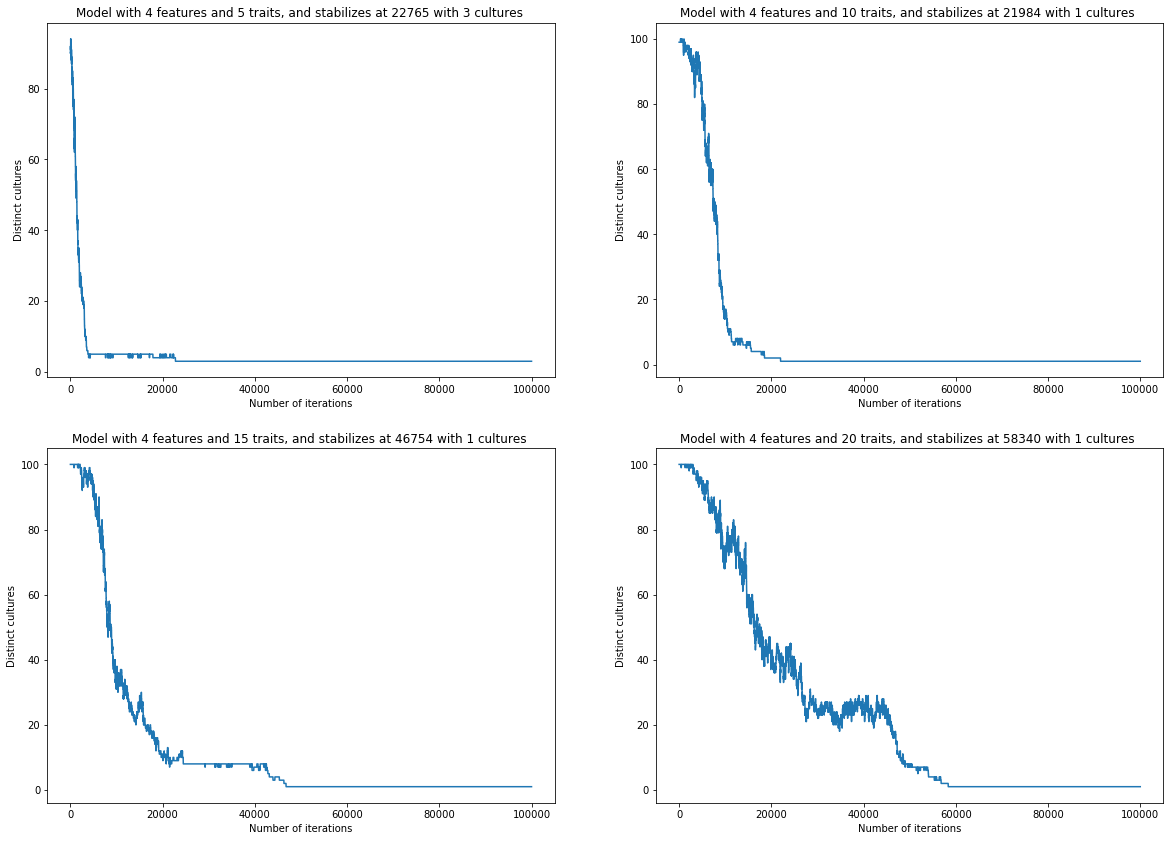

In [129]:
plt.figure(figsize=(20, 30))
plt.subplot(4,2,1)
plotit(4,5,100000)
plt.subplot(4,2,2)
plotit(4,10,100000)
plt.subplot(4,2,3)
plotit(4,15,100000)
plt.subplot(4,2,4)
plotit(4,20,100000)

Here we try out the fully connected topology, number of features is constant, but the number of traits grows with step 5 (5 traits, 10 traits, 15 traits, 20 traits). As the number of traits grows, it takes more time to reach the mono culture.

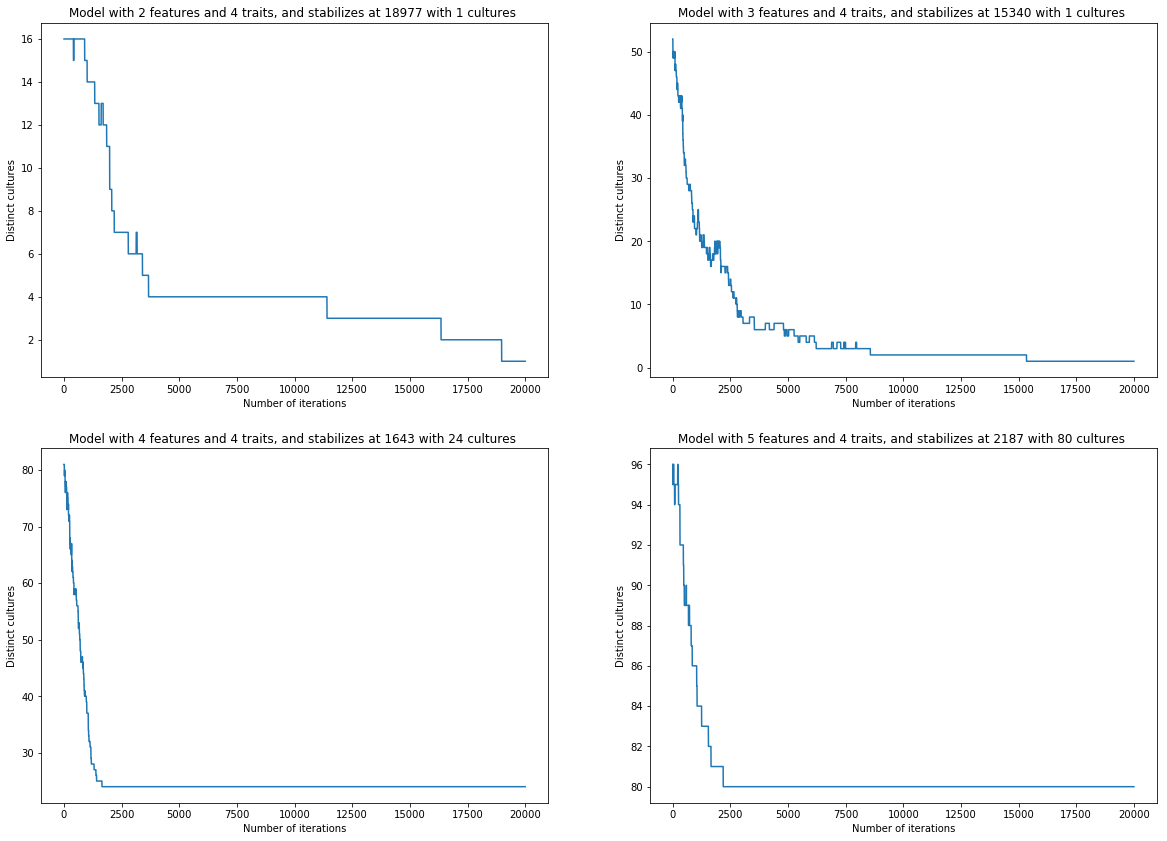

In [153]:
plt.figure(figsize=(20, 30))
plt.subplot(4,2,1)
plotit(2,4,20000)
plt.subplot(4,2,2)
plotit(3,4,20000)
plt.subplot(4,2,3)
plotit(4,4,20000)
plt.subplot(4,2,4)
plotit(5,4,20000)

In case of increasing the number of features (and staying with a fixed number of traits), there is a higher probability that two people have something in common, therefore, the interaction rate is higher, so stabilization is achieved faster, but it is not necesseraly a mono culture